# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name**.

In [3]:
import pandas as pd

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [6]:
df = pd.read_csv('animals.csv')

In [7]:
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35
6,cat,Xypher,10


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [28]:
print(df.shape[0])
print(df.shape[1])

#can you explain this one? I looked this up on stack overflow, but I am not sure why this is the answer.

7
3


In [17]:
df.columns

Index(['animal', 'name', 'length'], dtype='object')

In [18]:
df.dtypes

animal    object
name      object
length     int64
dtype: object

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [11]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [16]:
df.sort_values(by='length').tail(3)

,animal,name,length
1,cat,Bob,45
3,dog,Devon,50
2,dog,Egglesburg,65


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [83]:
print(df.length.mean())
print(df.length.std())

#not sure how to do it with a single command
#print(df.length.mean().std())

38.857142857142854
17.101935284528196


## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [32]:
df.animal.value_counts()

cat    4
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [37]:
df[df.animal=='dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [39]:
df[df.length > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [42]:
df['inches'] = (df.length*2.54).round(1)
df

,animal,name,length,inches
0,cat,Anne,35,88.9
1,cat,Bob,45,114.3
2,dog,Egglesburg,65,165.1
3,dog,Devon,50,127.0
4,cat,Charlie,32,81.3
5,dog,Fontaine,35,88.9
6,cat,Xypher,10,25.4


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [51]:
cats = (df.animal == 'cat')

In [52]:
dogs = (df.animal == 'dog')

In [54]:
cats.head()

0     True
1     True
2    False
3    False
4     True
Name: animal, dtype: bool

## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [58]:
df[cats&(df.inches>12)]

,animal,name,length,inches
0,cat,Anne,35,88.9
1,cat,Bob,45,114.3
4,cat,Charlie,32,81.3
6,cat,Xypher,10,25.4


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [75]:
df.inches.mean()

98.69999999999997

In [89]:
df.groupby(by=cats).inches.mean()
# I don't think it should be returning the False parameter also? right?

animal
False    127.000
True      77.475
Name: inches, dtype: float64

In [94]:
df.groupby(by=dogs).inches.mean()
# same here. Not sure why I am getting both True and False

animal
False     77.475
True     127.000
Name: inches, dtype: float64

## 13) If you didn't already, use `groupby` to do #12 all at once

In [96]:
df.groupby(by=dogs & cats).inches.mean()
# don't believe this is correct

animal
False    98.7
Name: inches, dtype: float64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

<AxesSubplot:>

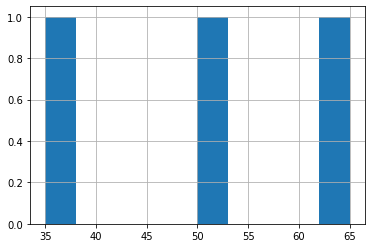

In [104]:
df[dogs].length.hist()
#this does not seem correct to me.  I am not sure what I am doing wrong here. I believe it represents what the data has, but it really does look terrible. 

In [103]:
df[dogs].length

2    65
3    50
5    35
Name: length, dtype: int64

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

name
Anne          AxesSubplot(0.125,0.125;0.775x0.755)
Bob           AxesSubplot(0.125,0.125;0.775x0.755)
Charlie       AxesSubplot(0.125,0.125;0.775x0.755)
Devon         AxesSubplot(0.125,0.125;0.775x0.755)
Egglesburg    AxesSubplot(0.125,0.125;0.775x0.755)
Fontaine      AxesSubplot(0.125,0.125;0.775x0.755)
Xypher        AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

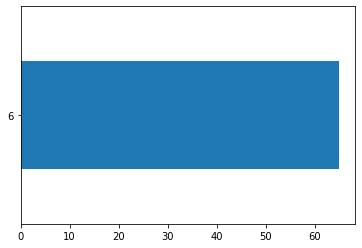

In [106]:
df.groupby(by='name').length.plot(kind='barh')

#hmmmm I am not sure how this is different than the example that we had in class. Why are the names counted rather than listed as the X axis?


In [111]:
df.name.length.plot(kind='barh')
#still not sure 

AttributeError: 'Series' object has no attribute 'length'

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

In [112]:
df[cats].length.sort_values()

6    10
4    32
0    35
1    45
Name: length, dtype: int64

In [113]:
df[cats].length.sort_values(ascending=False)

1    45
0    35
4    32
6    10
Name: length, dtype: int64

<AxesSubplot:>

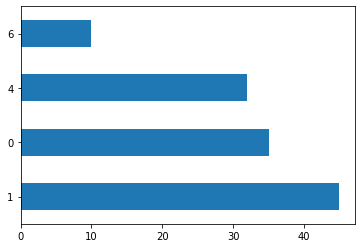

In [114]:
df[cats].length.sort_values(ascending=False).plot(kind='barh')

In [115]:
#How do we notatate the axis!!!!! It's using teh index rather than the names still.  Also why did it plot in the opposite of what I sorted?

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [116]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [121]:
df[dogs].count().animal

3

In [122]:
df[cats].count().animal

4

In [123]:
#I don't know how to do axis

In [124]:
(df[dogs].count().animal).(df[cats].count().animal).plot(kind='bar').title = "Number of Animals"

SyntaxError: invalid syntax (<ipython-input-124-46a1ec71de6b>, line 1)

In [ ]:
#no idea on this one. 